In [1]:
from ca_v1 import CA
import numpy as np
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


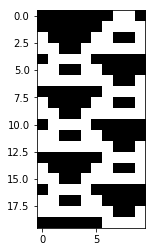

In [103]:
#OS DADOS A RESPEITO DO AUTOMATO CELULAR SÂO CRIADOS POR MEIO DE UMA CLASSE EM OUTRO ARQUIVO
rule=90
updt=20
grid=10
N_data=1000
DATA=np.zeros((N_data,grid))
RESULTS=np.zeros((N_data,grid))
for i in range(N_data):
    C_A=CA(grid,rule,0,BC=1)
    FM=np.array(C_A.evo(updt))
    DATA[i,:]=FM[0,:]
    RESULTS[i,]=FM[-1,:]


In [16]:
model = Sequential()

In [17]:
model.add(Dense(15,activation='relu',use_bias=True, input_dim=grid))

In [18]:
model.add(Dense(15,activation='relu'))

In [19]:
model.add(Dense(grid,activation='sigmoid'))

In [20]:
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                160       
Total params: 565
Trainable params: 565
Non-trainable params: 0
_________________________________________________________________


In [21]:
END=int(len(DATA)*0.9)#UTILIZA-SE 90% DOS DADOS PARA O TREINAMENTO
DATA_trainning=DATA[:END,:]
RESULTS_trainning=RESULTS[:END,:]
DATA_check=DATA[END:,:]
RESULTS_check=RESULTS[END:,:]


In [27]:
model.fit(DATA_trainning,RESULTS_trainning, epochs=50, batch_size=10, validation_split=0.1)

Train on 810 samples, validate on 90 samples
Epoch 1/50
810/810 [==============================] - 0s 385us/step - loss: 0.0546 - accuracy: 0.9702 - val_loss: 0.0583 - val_accuracy: 0.9667
Epoch 2/50
810/810 [==============================] - 0s 376us/step - loss: 0.0546 - accuracy: 0.9700 - val_loss: 0.0578 - val_accuracy: 0.9689
Epoch 3/50
810/810 [==============================] - 0s 367us/step - loss: 0.0540 - accuracy: 0.9695 - val_loss: 0.0580 - val_accuracy: 0.9711
Epoch 4/50
810/810 [==============================] - 0s 343us/step - loss: 0.0538 - accuracy: 0.9712 - val_loss: 0.0614 - val_accuracy: 0.9700
Epoch 5/50
810/810 [==============================] - 0s 375us/step - loss: 0.0535 - accuracy: 0.9710 - val_loss: 0.0578 - val_accuracy: 0.9722
Epoch 6/50
810/810 [==============================] - 0s 375us/step - loss: 0.0533 - accuracy: 0.9714 - val_loss: 0.0570 - val_accuracy: 0.9711
Epoch 7/50
810/810 [==============================] - 0s 462us/step - loss: 0.0531 - accura

In [66]:
RESULTS_NN=model.predict(DATA_check)#, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)


[[1.81849226e-02 1.00000000e+00 1.00000000e+00 6.77585527e-02
  4.41968301e-03 9.97859061e-01 9.75575620e-10 4.58887977e-15
  9.96129513e-01 5.10505743e-05]
 [2.35127845e-05 9.99464929e-01 2.19255671e-08 4.76145744e-01
  9.99999762e-01 3.91833633e-02 9.99999762e-01 1.31406993e-01
  1.63754084e-04 4.33188052e-06]
 [9.98000085e-01 9.99640584e-01 9.97540832e-01 8.53916883e-01
  1.40224562e-20 1.14621095e-01 3.64548992e-03 1.00000000e+00
  6.21187091e-02 1.00000000e+00]
 [9.99710977e-01 2.66016347e-08 4.16947530e-14 4.37127054e-01
  9.25786765e-07 9.88885283e-01 2.88885499e-14 9.64001298e-01
  9.99975443e-01 2.07680514e-05]
 [1.36271346e-05 1.16184056e-04 1.00000000e+00 9.97221828e-01
  1.00000000e+00 9.99934077e-01 1.00000000e+00 1.00000000e+00
  9.90079522e-01 1.00000000e+00]
 [1.00000000e+00 1.81713328e-02 5.70786833e-05 8.88898790e-01
  1.00000000e+00 1.00000000e+00 1.00000000e+00 2.11909381e-14
  9.99139309e-01 2.95825266e-05]
 [7.29390013e-05 9.99987006e-01 1.67260005e-05 4.56216216e

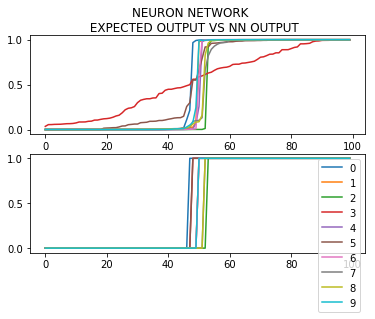

In [68]:
fig,axs=plt.subplots(nrows=2,ncols=1)#,figsize=(200,50),dpi=100)
aux_1=np.arange(len(RESULTS_NN))
plt.suptitle('NEURON NETWORK \n EXPECTED OUTPUT VS NN OUTPUT')
for i in range(grid):
    rgb = np.random.rand(3,)
    num=str(i)
    axs[1].plot(aux_1,sorted(RESULTS_check[:,i]),label=num)
    axs[0].plot(aux_1,sorted(RESULTS_NN[:,i]),label=num)
plt.legend( loc = 'upper right')

plt.show()

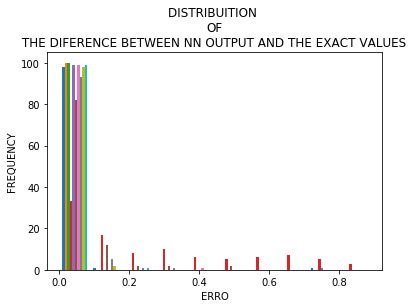

In [47]:
ERRO=np.fabs(RESULTS_check-RESULTS_NN)
plt.hist(ERRO,bins=10)
plt.title("DISTRIBUITION \nOF\n THE DIFERENCE BETWEEN NN OUTPUT AND THE EXACT VALUES ")
plt.ylabel('FREQUENCY')
plt.xlabel('ERRO')
plt.show()

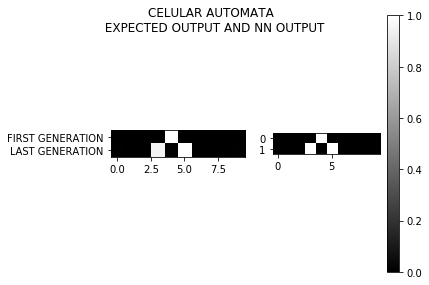

In [95]:
COMPARE=CA(grid,rule,1,BC=1).evo(updt)
TEST_NN=np.zeros((updt,grid))
TEST_NN[0,:]=COMPARE[0:1,:]
TEST_NN[-1,:]=model.predict(COMPARE[0:1,:])
plt.suptitle('CELULAR AUTOMATA \n EXPECTED OUTPUT AND NN OUTPUT')
plt.subplot(121)
plt.imshow(TEST_NN[0::updt-1,0:15],cmap='gray')
plt.yticks(np.arange(2),['FIRST GENERATION','LAST GENERATION'])
plt.subplot(122)
plt.imshow(COMPARE[0::updt-1,:],cmap='gray')
plt.colorbar()
plt.tight_layout()
plt.show()

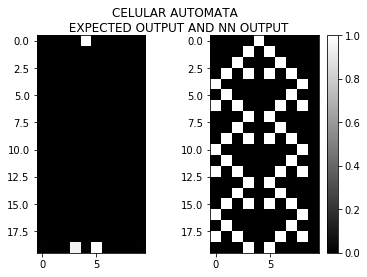

In [100]:
plt.suptitle('CELULAR AUTOMATA \n EXPECTED OUTPUT AND NN OUTPUT')
plt.subplot(121)
plt.imshow(TEST_NN[0:,0:15],cmap='gray')
plt.subplot(122)
plt.imshow(COMPARE[0:,:],cmap='gray')
plt.colorbar()
plt.show()